In [1]:
import pyNUISANCE as pn
import pyNuHepMC as nhm

In [ ]:
evs = pn.EventSource("dune_argon_sf_10mega.nuwro.pb.gz")
if not evs:
    print("Error: failed to open input file")

In [3]:
def enu_GeV(ev):
    return nhm.EventUtils.GetBeamParticle(ev).momentum().e() * 1E-3
ev,_ = evs.first()
print(enu_GeV(ev))

def elep_GeV(ev):
    beamp = nhm.EventUtils.GetBeamParticle(ev)
    beam_pid = beamp.pid()
    cc_lep_pid = (beam_pid - 1) if (beam_pid > 0) else (beam_pid + 1);
    lep = nhm.EventUtils.GetParticle_FirstRealFinalState(ev, [int(cc_lep_pid)])
    if lep:
        return lep.momentum().e() * 1E-3
    return -0

print(elep_GeV(ev))

2.2748704837946896
1.2503555877599393


In [4]:
dir(pn)

['Binning',
 'ColumnInfo',
 'ComparisonFrame',
 'EventSource',
 'Frame',
 'FrameGen',
 'HistFrame',
 'Prob3plusplusWeightCalc',
 'Project',
 'Record',
 'RecordFactory',
 'Table',
 'Vector_bool',
 'Vector_double',
 'Vector_int',
 'Vector_uint32_t',
 'WeightCalc',
 'WeightCalcFactory',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'hm',
 'pps',
 'pyProSelecta']

In [5]:
wt2k_disp = pn.Prob3plusplusWeightCalc()
wt2k_disp.set_parameters({"baseline:DUNE": 1, "t2k:bestfit": 1, "osc:numu_disp":1})
wt2k_app = pn.Prob3plusplusWeightCalc()
wt2k_app.set_parameters({"baseline:DUNE": 1, "t2k:bestfit": 1, "osc:numu_to_nue":1})

wnf5_disp = pn.Prob3plusplusWeightCalc()
wnf5_disp.set_parameters({"baseline:DUNE": 1, "NuFit:5.2": 1, "osc:numu_disp":1})
wnf5_app = pn.Prob3plusplusWeightCalc()
wnf5_app.set_parameters({"baseline:DUNE": 1, "NuFit:5.2": 1, "osc:numu_to_nue":1})


[2024-03-05 17:17:45.498] [info] [Prob3plusplusWeightCalc]: Set numu disappearance oscillation channel: 2 -> 2
[2024-03-05 17:17:45.498] [info] [Prob3plusplusWeightCalc]: Set baseline_km = 1300
[2024-03-05 17:17:45.498] [info] [Prob3plusplusWeightCalc]: Set DUNE baseline
[2024-03-05 17:17:45.498] [info] [Prob3plusplusWeightCalc]: Set sinsq_th12 = 0.297
[2024-03-05 17:17:45.498] [info] [Prob3plusplusWeightCalc]: Set sinsq_th13 = 0.0214
[2024-03-05 17:17:45.498] [info] [Prob3plusplusWeightCalc]: Set sinsq_th23 = 0.526
[2024-03-05 17:17:45.498] [info] [Prob3plusplusWeightCalc]: Set dmsq_21 = 7.37e-05
[2024-03-05 17:17:45.498] [info] [Prob3plusplusWeightCalc]: Set dmsq_atm = 0.002463
[2024-03-05 17:17:45.498] [info] [Prob3plusplusWeightCalc]: Set dcp_rad = 0
[2024-03-05 17:17:45.498] [info] [Prob3plusplusWeightCalc]: Set T2K bestfit parameters
[2024-03-05 17:17:45.498] [info] [Prob3plusplusWeightCalc]: Set numu to nue appearance oscillation channel: 2 -> 1
[2024-03-05 17:17:45.498] [info] 

In [6]:
print(pn.FrameGen(evs).limit(20)
      .add_column("enu_GeV",enu_GeV)
      .add_column("elep_GeV",elep_GeV)
      .add_column("T2K B.F. P(numu->numu)", wt2k_disp.calc_weight)
      .add_column("T2K B.F. P(numu->nue)", wt2k_app.calc_weight)
      .add_column("NuFit 5.2 P(numu->numu)", wnf5_disp.calc_weight)
      .add_column("NuFit 5.2 P(numu->nue)", wnf5_app.calc_weight)
      .all())

 -----------------------------------------------------------------------------------------------
 | evt# | cvw | enu_GeV | elep_GeV | T2K B.F. P($ | T2K B.F. P($ | NuFit 5.2 P$ | NuFit 5.2 P$ |
 -----------------------------------------------------------------------------------------------
 |    0 |   1 |   2.275 |     1.25 |      0.05437 |      0.06693 |      0.08036 |      0.07433 |
 |    1 |   1 |    14.3 |   0.8818 |       0.9199 |     0.004287 |       0.9179 |     0.004895 |
 |    2 |   1 |    2.86 |   0.2383 |      0.01832 |       0.0649 |      0.02232 |      0.07304 |
 |    3 |   1 |   3.728 |   0.7166 |       0.2048 |      0.04962 |       0.1972 |      0.05627 |
 |    4 |   1 |    9.08 |    6.874 |       0.8092 |      0.01056 |       0.8047 |      0.01206 |
 |    5 |   1 |   3.237 |    1.004 |      0.08881 |      0.05852 |      0.08565 |      0.06614 |
 |    6 |   1 |   2.473 |    1.832 |     0.008372 |      0.06826 |      0.02523 |      0.07626 |
 |    7 |   1 |   1.916 |    1

In [7]:
from math import log

etrue_ax = pn.Binning.log10_space(50,0.1,5, "enu")
elep_ax = pn.Binning.lin_space(50,0,5, "elep")
etrue_elep = pn.Binning.product([etrue_ax, elep_ax])

hf = pn.HistFrame(etrue_elep,"unosc")
hf.add_column("T2K B.F. P(numu->numu)")
hf.add_column("T2K B.F. P(numu->nue)")
hf.add_column("NuFit 5.2 P(numu->nue)")
hf.add_column("NuFit 5.2 P(numu->nue)")
for i, (ev, cvw) in enumerate(evs):
    enu = enu_GeV(ev)
    projs = [enu, elep_GeV(ev)]
    if(projs[1] == 0):
        continue
    hf.fill(projs,cvw)
    hf.fill(projs,cvw*wt2k_disp.prob(enu),1)
    hf.fill(projs,cvw*wt2k_app.prob(enu),2)
    hf.fill(projs,cvw*wnf5_disp.prob(enu),3)
    hf.fill(projs,cvw*wnf5_app.prob(enu),4)
    if i >= 5E5:
        break
print(hf)

 ---------------------------------------------------------------------------------------------------------
 | bin | unosc | err | T2K B.F. P($ | err | T2K B.F. P($ | err | NuFit 5.2 P$ | err | NuFit 5.2 P$ | err |
 ---------------------------------------------------------------------------------------------------------
 |   0 |     0 |   0 |            0 |   0 |            0 |   0 |            0 |   0 |            0 |   0 |
 |   1 |     0 |   0 |            0 |   0 |            0 |   0 |            0 |   0 |            0 |   0 |
 |   2 |     0 |   0 |            0 |   0 |            0 |   0 |            0 |   0 |            0 |   0 |
 |   3 |     0 |   0 |            0 |   0 |            0 |   0 |            0 |   0 |            0 |   0 |
 |   4 |     0 |   0 |            0 |   0 |            0 |   0 |            0 |   0 |            0 |   0 |
 |   5 |     0 |   0 |            0 |   0 |            0 |   0 |            0 |   0 |            0 |   0 |
 |   6 |     0 |   0 |            0 |

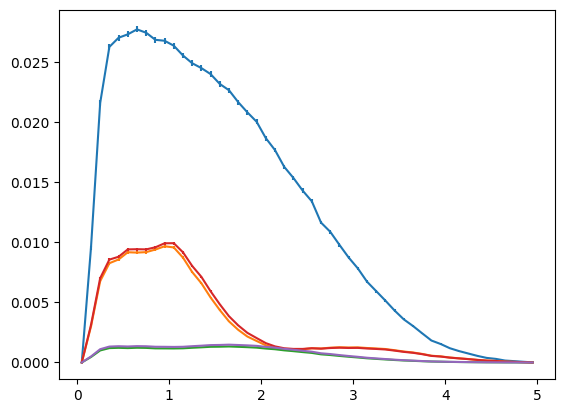

In [10]:
import matplotlib.pyplot as plt
import numpy as np

hfp = pn.Project(hf,1)

bin_centers = [ ((x[0].min + x[0].max) / 2.0) for x in hfp.binning.bins ]
bin_widths = [ (x[0].max - x[0].min) for x in hfp.binning.bins ]

sf = evs.fatx()/evs.sumw()

plt.errorbar(bin_centers,hfp.contents[:,0]*sf,yerr=np.sqrt(hfp.variance[:,0])*sf)
plt.errorbar(bin_centers,hfp.contents[:,1]*sf,yerr=np.sqrt(hfp.variance[:,1])*sf)
plt.errorbar(bin_centers,hfp.contents[:,2]*sf,yerr=np.sqrt(hfp.variance[:,2])*sf)
plt.errorbar(bin_centers,hfp.contents[:,3]*sf,yerr=np.sqrt(hfp.variance[:,3])*sf)
plt.errorbar(bin_centers,hfp.contents[:,4]*sf,yerr=np.sqrt(hfp.variance[:,4])*sf)
plt.show()